# WDC Progression

In [27]:
import pandas as pd
import sqlite3


con = sqlite3.connect("../data/f1data.sqlite")

In [28]:
query = """
SELECT
  r.date,
  r.round,
  d.code,
  d.forename || ' ' || d.surname AS name,
  ds.position,
  ds.points
FROM driver_standings AS ds
JOIN races r on ds.raceId = r.raceId
JOIN drivers d on ds.driverId = d.driverId
WHERE r.year = 2022
"""

df = pd.read_sql(query, con)

pivot = df.pivot(index="date", columns="code", values="points")
pivot.tail()

code,ALB,ALO,BOT,GAS,HAM,HUL,LAT,LEC,MAG,MSC,...,OCO,PER,RIC,RUS,SAI,STR,TSU,VER,VET,ZHO
date,,,,,,,,,,,,,,,,,,,,,
2022-03-20,0.0,2.0,8.0,0.0,15.0,0.0,0.0,26.0,10.0,0.0,...,6.0,0.0,0.0,12.0,18.0,0.0,4.0,0.0,NaN,1.0
2022-03-27,0.0,2.0,8.0,4.0,16.0,0.0,0.0,45.0,12.0,0.0,...,14.0,12.0,0.0,22.0,33.0,0.0,4.0,25.0,NaN,1.0
2022-04-10,1.0,2.0,12.0,6.0,28.0,0.0,0.0,71.0,12.0,0.0,...,20.0,30.0,8.0,37.0,33.0,0.0,4.0,25.0,0.0,1.0
2022-04-24,1.0,2.0,24.0,6.0,28.0,0.0,0.0,86.0,15.0,0.0,...,20.0,54.0,11.0,49.0,38.0,1.0,10.0,59.0,4.0,1.0


<AxesSubplot:xlabel='date'>

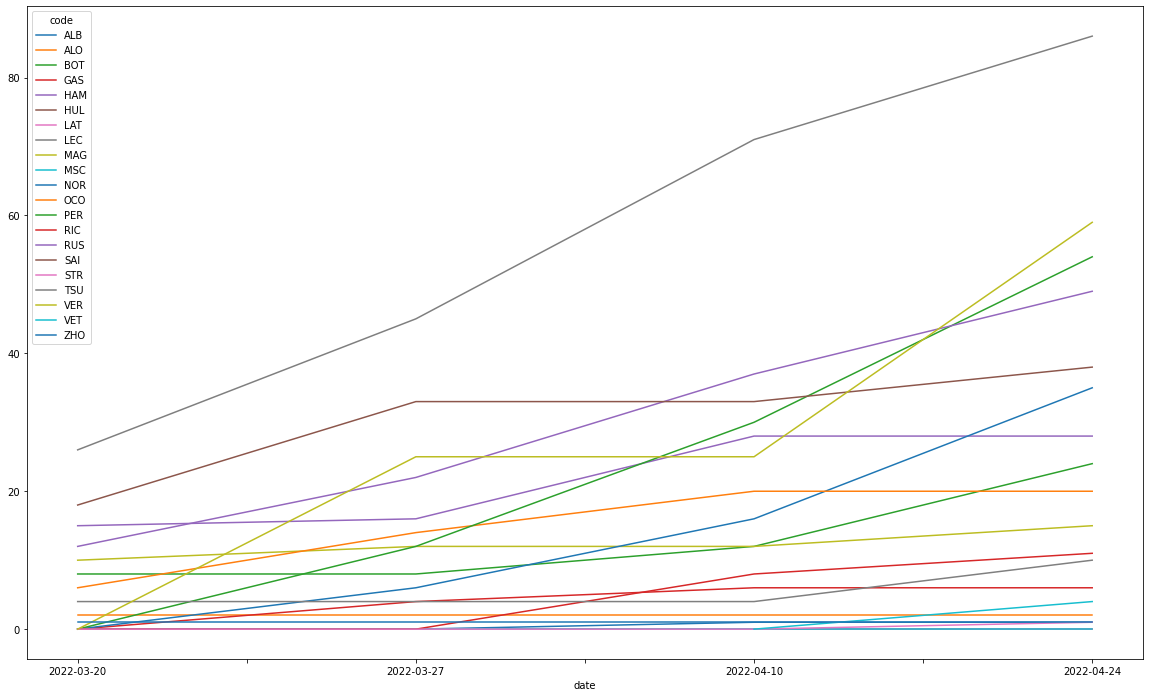

In [29]:
pivot.plot(figsize=(20,12))